## 第二问：亚类划分

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from matplotlib.font_manager import FontProperties 
from pandas.plotting import scatter_matrix

In [7]:
df=pd.read_excel('副本附件2.xlsx')
df = shuffle(df, random_state=42) 
df = df.reset_index(drop = True)
df

,文物采样点,类型,颜色,纹饰,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,34,铅钡,深绿,C,风化,35.78,0.00,0.25,0.78,0.00,1.62,0.47,1.51,46.55,10.00,0.34,0.22,0.0,0.00
1,14,高钾,深绿,C,无风化,62.47,3.38,12.28,8.23,0.66,9.23,0.50,0.47,1.62,0.00,0.16,0.00,0.0,0.00
2,04,高钾,蓝绿,A,无风化,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
3,08,铅钡,紫,B,风化,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.0,2.58
4,42未风化点2,铅钡,浅蓝,A,风化,51.33,5.68,0.35,0.00,1.16,5.66,0.00,2.72,20.12,10.88,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,36,铅钡,深绿,C,风化,39.57,2.22,0.14,0.37,0.00,1.60,0.32,0.68,41.61,10.83,0.07,0.22,0.0,0.00
63,20,铅钡,浅蓝,A,无风化,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.0,0.00
64,53未风化点,铅钡,浅蓝,A,风化,63.66,3.04,0.11,0.78,1.14,6.06,0.00,0.54,13.66,8.99,0.00,0.27,0.0,0.00
65,12,高钾,蓝绿,B,风化,94.29,0.00,1.01,0.72,0.00,1.46,0.29,1.65,0.00,0.00,0.15,0.00,0.0,0.00


### 对高钾进行亚类划分

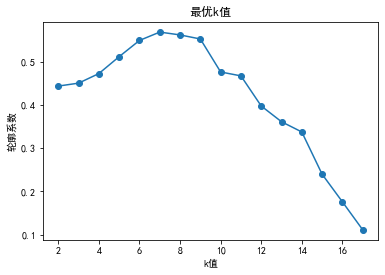

最优k值： 7


<Figure size 432x288 with 0 Axes>

In [10]:
# k值寻优，敏感性分析
plt.rcParams['font.sans-serif'] = ['SimHei']
z_norm = lambda x:(x-np.mean(x))/np.std(x)
df_gj = df[df['类型']=='高钾']
df_norm = df_gj[['氧化铅(PbO)','氧化钡(BaO)','氧化锶(SrO)','氧化钾(K2O)']].apply(z_norm) 
X = np.array(df_norm)
score = []

for i in range(2,len(df_gj)):
    km = KMeans(n_clusters=i).fit(X)
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_gj)),score)
plt.scatter(np.arange(2,len(df_gj)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
print('最优k值：',score.index(max(score))+2)
plt.savefig("C:\\Users\\HUAWEI\\Desktop\\2022国赛\\1.png")

In [ ]:
# kmeans聚类
km = KMeans(n_clusters=7).fit(X)
print("centroids:\n", km.cluster_centers_) 
print("results:\n", km.labels_) 
y_pred = km.labels_
df_gj  = df_gj.reset_index(drop = True)
df_gj['Result'] = km.labels_

In [ ]:
# 将center去标准化
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_gj['氧化铅(PbO)'])+np.mean(df_gj['氧化铅(PbO)'])
new[1] = new[1]*np.std(df_gj['氧化钡(BaO)'])+np.mean(df_gj['氧化钡(BaO)'])
new[2] = new[2]*np.std(df_gj['氧化锶(SrO)'])+np.mean(df_gj['氧化锶(SrO)'])
new[3] = new[3]*np.std(df_gj['氧化钾(K2O)'])+np.mean(df_gj['氧化钾(K2O)'])
new2 = np.transpose(new)
new2

In [ ]:
# 寻找分类结果
for j in range(7):
    for i in range(len(df_gj)):
        if df_gj.loc[i,'Result'] == j:
            print(df_gj.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
# 合理性分析
df_d1 = df_gj.copy()
plt.figure(figsize = (20,10))
plt.title('高钾亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d1.iloc[:,5:],'Result',color = ['red','orange','green','black'])

### 对铅钡进行亚类划分

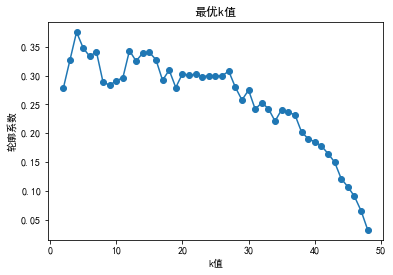

最优k值 4


<Figure size 432x288 with 0 Axes>

In [13]:
# k值寻优，敏感性分析
z_norm = lambda x:(x-np.mean(x))/np.std(x)
df_qb = df[df['类型']=='铅钡']
df_norm = df_qb[['氧化铅(PbO)','氧化钡(BaO)','氧化锶(SrO)','氧化钾(K2O)']].apply(z_norm)
X = np.array(df_norm)
score = []
for i in range(2,len(df_qb)):
    km = KMeans(n_clusters=i).fit(X)
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_qb)),score)
plt.scatter(np.arange(2,len(df_qb)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
plt.savefig("C:\\Users\\HUAWEI\\Desktop\\2022国赛\\2.jpg")
print('最优k值',(score.index(max(score))+2))

In [ ]:
# kmeans聚类
km = KMeans(n_clusters=4).fit(X)
print("centroids:\n", km.cluster_centers_) 
print("results:\n", km.labels_) 
y_pred = km.labels_
df_qb  = df_qb.reset_index(drop = True)
df_qb['Result'] = km.labels_

In [ ]:
# 去标准化
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_qb['氧化铅(PbO)'])+np.mean(df_qb['氧化铅(PbO)'])
new[1] = new[1]*np.std(df_qb['氧化钡(BaO)'])+np.mean(df_qb['氧化钡(BaO)'])
new[2] = new[2]*np.std(df_qb['氧化锶(SrO)'])+np.mean(df_qb['氧化锶(SrO)'])
new[3] = new[3]*np.std(df_qb['氧化钾(K2O)'])+np.mean(df_qb['氧化钾(K2O)'])
new2 = np.transpose(new)
new2

In [ ]:
for j in range(4):
    for i in range(len(df_qb)):
        if df_qb.loc[i,'Result'] == j:
            print(df_qb.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
df_d2 = df_qb.copy()
plt.figure(figsize = (20,10))
plt.title('铅钡亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d2.iloc[:,5:],'Result',color = ['red','green','black','Purple'])

### 对纹饰A进行亚类划分

In [ ]:
# 标记样本
idx = 0
for i in df.loc[:,'纹饰']:
    if i == 'A':
        df.loc[idx,'纹饰'] = 0
    idx += 1
idx = 0
for i in df.loc[:,'纹饰']:
    if i == 'B':
        df.loc[idx,'纹饰'] = 1
    idx += 1
idx = 0
for i in df.loc[:,'纹饰']:
    if i == 'C':
        df.loc[idx,'纹饰'] = 2
    idx += 1
df

In [ ]:
# 寻找重要化学成分
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,5:],df.iloc[:,3],test_size=0.2)
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[5, 6, 7, 8],  
    'n_estimators':[11,13,15],  
    'max_features':[0.3,0.4,0.5],
    'min_samples_split':[4,8,12,16] 
}

rfc = ensemble.RandomForestClassifier()
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid,
                      scoring='roc_auc', cv=4)
rfc_cv.fit(X_train, y_train.astype('int'))
rfc_cv.best_params_

In [ ]:
# 训练随机森林
rfc = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 0.3, min_samples_split= 4, n_estimators= 11)
rfc.fit(X_train,y_train.astype('int'))
test_est = rfc.predict(X_test)
print('随机森林精确度')
print(metrics.classification_report(test_est, y_test.astype('int')))
labels = df.columns[5:]
ipt = rfc.feature_importances_
indices = np.argsort(ipt)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, labels[indices[i]], ipt[indices[i]]))


In [ ]:
df_a = df[df['纹饰']=='A']
df_norm = df_a[['氧化铝(Al2O3)','氧化镁(MgO)','二氧化硅(SiO2)']].apply(z_norm)
X = np.array(df_norm) 

score = []
for i in range(2,len(df_a)):
    km = KMeans(n_clusters=i).fit(X)
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_a)),score)
plt.scatter(np.arange(2,len(df_a)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
print('最优k值:',score.index(max(score))+2)

In [ ]:
km = KMeans(n_clusters=5).fit(X) 
print("centroids:\n", km.cluster_centers_) 
print("results:\n", km.labels_) 
y_pred = km.labels_
df_a  = df_a.reset_index(drop = True)
df_a['Result'] = km.labels_

In [ ]:
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_a['氧化铝(Al2O3)'])+np.mean(df_a['氧化铝(Al2O3)'])
new[1] = new[1]*np.std(df_a['氧化镁(MgO)'])+np.mean(df_a['氧化镁(MgO)'])
new[2] = new[2]*np.std(df_a['二氧化硅(SiO2)'])+np.mean(df_a['二氧化硅(SiO2)'])
new2 = np.transpose(new)

new2

In [ ]:
for j in range(4):    
    for i in range(len(df_a)):
        if df_a.loc[i,'Result'] == j:
            print(df_a.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
df_d3 = df_a.copy()
plt.figure(figsize = (20,10))
plt.title('纹饰A亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d3.iloc[:,5:],'Result',color = ['green','red','yellow','Purple','cyan'])

### 对纹饰B进行亚类划分

In [ ]:
df_b = df[df['纹饰']=='B']
df_norm = df_b[['氧化铝(Al2O3)','氧化镁(MgO)','二氧化硅(SiO2)']].apply(z_norm)
X = np.array(df_norm)

score = []
for i in range(2,len(df_b)):
    km = KMeans(n_clusters=i).fit(X) 
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_b)),score)
plt.scatter(np.arange(2,len(df_b)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
print('最优k值:',score.index(max(score))+2)

In [ ]:
km = KMeans(n_clusters=3).fit(X)  
print("centroids:\n", km.cluster_centers_)  
print("results:\n", km.labels_) 
y_pred = km.labels_
df_b  = df_b.reset_index(drop = True)
df_b['Result'] = km.labels_

In [ ]:
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_b['氧化铝(Al2O3)'])+np.mean(df_b['氧化铝(Al2O3)'])
new[1] = new[1]*np.std(df_b['氧化镁(MgO)'])+np.mean(df_b['氧化镁(MgO)'])
new[2] = new[2]*np.std(df_b['二氧化硅(SiO2)'])+np.mean(df_b['二氧化硅(SiO2)'])
new2 = np.transpose(new)
new2

In [ ]:
for j in range(4):    
    for i in range(len(df_b)):
        if df_b.loc[i,'Result'] == j:
            print(df_b.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
df_d4 = df_b.copy()
plt.figure(figsize = (20,10))
plt.title('纹饰B亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d4.iloc[:,5:],'Result',color = ['blue','green','purple'])

### 对纹饰C进行亚类划分

In [ ]:
df_c = df[df['纹饰']=='C']
df_norm = df_c[['氧化铝(Al2O3)','氧化镁(MgO)','二氧化硅(SiO2)']].apply(z_norm)  
X = np.array(df_norm) 
score = []
for i in range(2,len(df_c)):
    km = KMeans(n_clusters=i).fit(X) 
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_c)),score)
plt.scatter(np.arange(2,len(df_c)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
print('最优k值：',score.index(max(score))+2)

In [ ]:
km = KMeans(n_clusters=6).fit(X) 
print("centroids:\n", km.cluster_centers_)  
print("results:\n", km.labels_)  
y_pred = km.labels_
df_c  = df_c.reset_index(drop = True)
df_c['Result'] = km.labels_

In [ ]:
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_c['氧化铝(Al2O3)'])+np.mean(df_c['氧化铝(Al2O3)'])
new[1] = new[1]*np.std(df_c['氧化镁(MgO)'])+np.mean(df_c['氧化镁(MgO)'])
new[2] = new[2]*np.std(df_c['二氧化硅(SiO2)'])+np.mean(df_c['二氧化硅(SiO2)'])
new2 = np.transpose(new)
new2

In [ ]:
for j in range(4):  
    for i in range(len(df_c)):
        if df_c.loc[i,'Result'] == j:
            print(df_c.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
df_d5 = df_c.copy()
plt.figure(figsize = (20,10))
plt.title('纹饰C亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d5.iloc[:,5:],'Result',color = ['yellow','green','black','cyan','red','blue'])

### 对颜色进行亚类划分

In [ ]:
# 数据处理
idx = 0 
for i in df['颜色']:
    if i == '蓝绿':
        df.loc[idx,'颜色'] = 0
    else:
        df.loc[idx, '颜色'] = 1
    idx += 1
df = df.dropna(axis = 0,how = 'any')
df = df.reset_index(drop = True)

In [ ]:
# 模型调参
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,5:],df.iloc[:,2],test_size=0.2)
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[5, 6, 7, 8],  
    'n_estimators':[11,13,15],
    'max_features':[0.5,1,2],
    'min_samples_split':[4,8,12,16] 
}

rfc = ensemble.RandomForestClassifier()
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid,
                      scoring='roc_auc', cv=4)
rfc_cv.fit(X_train, y_train.astype('int'))
rfc_cv.best_params_

In [ ]:
# 寻找最优化学成分
rfc = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 0.5, min_samples_split= 4, n_estimators= 15)
rfc.fit(X_train,y_train.astype('int'))
test_est = rfc.predict(X_test)
print('随机森林精确度...')
print(metrics.classification_report(test_est, y_test.astype('int')))
labels = df.columns[5:]
ipt = rfc.feature_importances_
indices = np.argsort(ipt)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, labels[indices[i]], ipt[indices[i]]))

In [ ]:
df_bg = df[df['颜色']==0]
df_norm = df_bg[['氧化锶(SrO)','氧化铅(PbO)','二氧化硅(SiO2)']].apply(z_norm)  
X = np.array(df_norm)  
score = []
for i in range(2,len(df_bg)):
    km = KMeans(n_clusters=i).fit(X) 
    y_pred = km.labels_
    score.append(silhouette_score(X, y_pred))
    
plt.plot(np.arange(2,len(df_bg)),score)
plt.scatter(np.arange(2,len(df_bg)),score)
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('最优k值')
plt.show()
print('最优k值：',score.index(max(score))+2)

In [ ]:
km = KMeans(n_clusters=3).fit(X)  
print("centroids:\n", km.cluster_centers_) 
print("results:\n", km.labels_) 
y_pred = km.labels_
df_bg  = df_bg.reset_index(drop = True)
df_bg['Result'] = km.labels_

In [ ]:
new  = np.transpose(km.cluster_centers_)
new[0] = new[0]*np.std(df_bg['氧化锶(SrO)'])+np.mean(df_bg['氧化锶(SrO)'])
new[1] = new[1]*np.std(df_bg['氧化铅(PbO)'])+np.mean(df_bg['氧化铅(PbO)'])
new[2] = new[2]*np.std(df_bg['二氧化硅(SiO2)'])+np.mean(df_bg['二氧化硅(SiO2)'])
new2 = np.transpose(new)
new2

In [ ]:
for j in range(3):
    for i in range(len(df_bg)):
        if df_bg.loc[i,'Result'] == j:
            print(df_bg.loc[i,'文物采样点'])
    print('group',j)

In [ ]:
df_d6 = df_bg.copy()
plt.figure(figsize = (20,10))
plt.title('蓝绿亚类划分可视化',fontsize = 20)
pd.plotting.andrews_curves(df_d6.iloc[:,5:],'Result',color = ['red','green','blue'])